<a href="https://colab.research.google.com/github/Njeri-Gitome/Financial_Inclusion_in_Africa/blob/main/financial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1460]:
#Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1461]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1462]:
# Loading data
test = pd.read_csv('/content/drive/MyDrive/Datasets/Financial_Inclusion/Test.csv')
train = pd.read_csv ('/content/drive/MyDrive/Datasets/Financial_Inclusion/Train.csv')
definitions = pd.read_csv('/content/drive/MyDrive/Datasets/Financial_Inclusion/VariableDefinitions.csv')
sample =pd.read_csv('/content/drive/MyDrive/Datasets/Financial_Inclusion/SampleSubmission.csv')

In [1463]:
# Variable definitions
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [1464]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [1465]:
# Submission sample template
'''
The likelihood of the person having a bank account or not (Yes = 1, No = 0)
'''
sample.head(7)

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0
5,uniqueid_6 x Kenya,0
6,uniqueid_7 x Kenya,0


# Understanding the dataset

In [1466]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [1467]:
# Shape of the training and testing set
print('Training set shape: ', train.shape)
print('Testing set shape: ', test.shape)

Training set shape:  (23524, 13)
Testing set shape:  (10086, 12)


In [1468]:
#Check for missing data
missing = train.isnull().sum()
missing

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [1469]:
#check for duplicates
duplicates =train.duplicated( )
duplicates[duplicates == True] # display if there duplicates

Series([], dtype: bool)

In [1470]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


##### Explore the country column

In [1471]:
#Check for the countries involved
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

<Axes: xlabel='country', ylabel='count'>

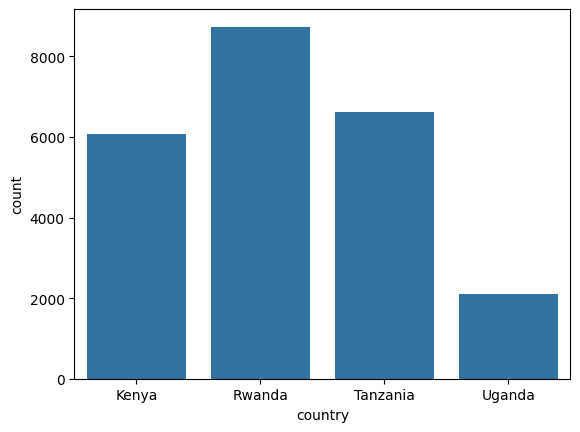

In [1472]:
# Explore the country distribution using a countplot for visualization
sns.countplot(train, x ='country')

##### Explore the bank account column

In [1473]:
train['bank_account'].unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='bank_account', ylabel='count'>

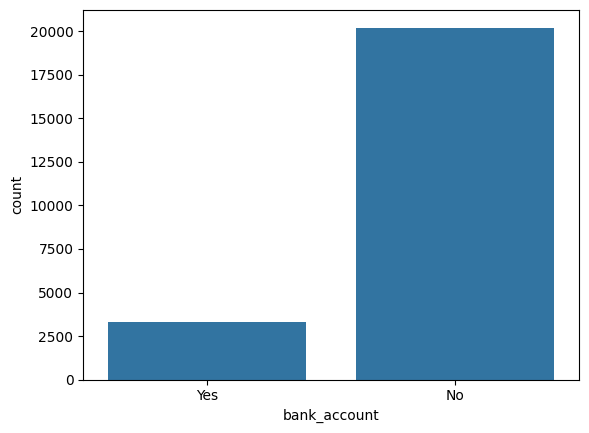

In [1474]:
sns.countplot(train, x= 'bank_account')

##### Explore the year column

In [1475]:
train['year'].unique()

array([2018, 2016, 2017])

<Axes: xlabel='year', ylabel='count'>

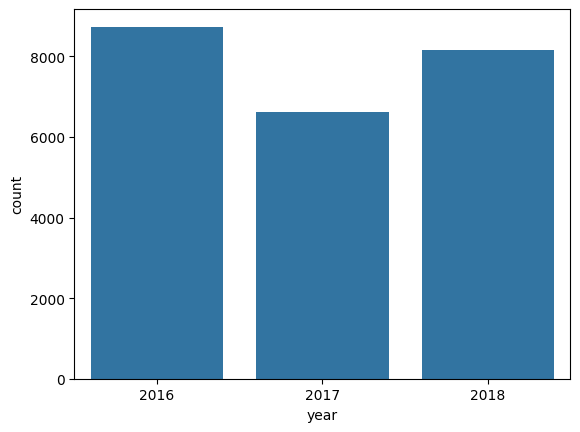

In [1476]:
sns.countplot(train, x='year')

##### Explore the location column

In [1477]:
train['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

<Axes: xlabel='location_type', ylabel='count'>

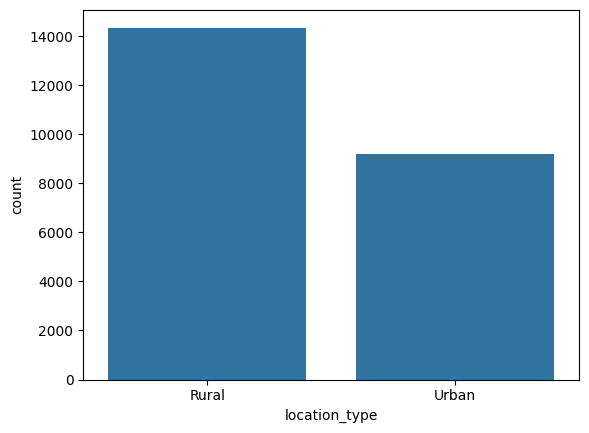

In [1478]:
sns.countplot(train, x='location_type')

##### Explore cellphone access


Text(0.5, 1.0, 'Cell phone access')

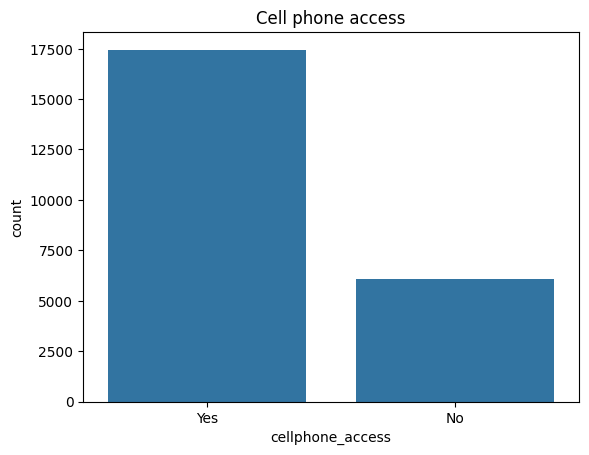

In [1479]:
sns.countplot(train, x= 'cellphone_access')

plt.title('Cell phone access')

##### Explore the household size

In [1480]:
train['household_size'].unique()

array([ 3,  5,  8,  7,  1,  6,  4, 10,  2, 11,  9, 12, 16, 15, 13, 14, 21,
       18, 17, 20])

Text(0.5, 1.0, 'Household size distribution plot')

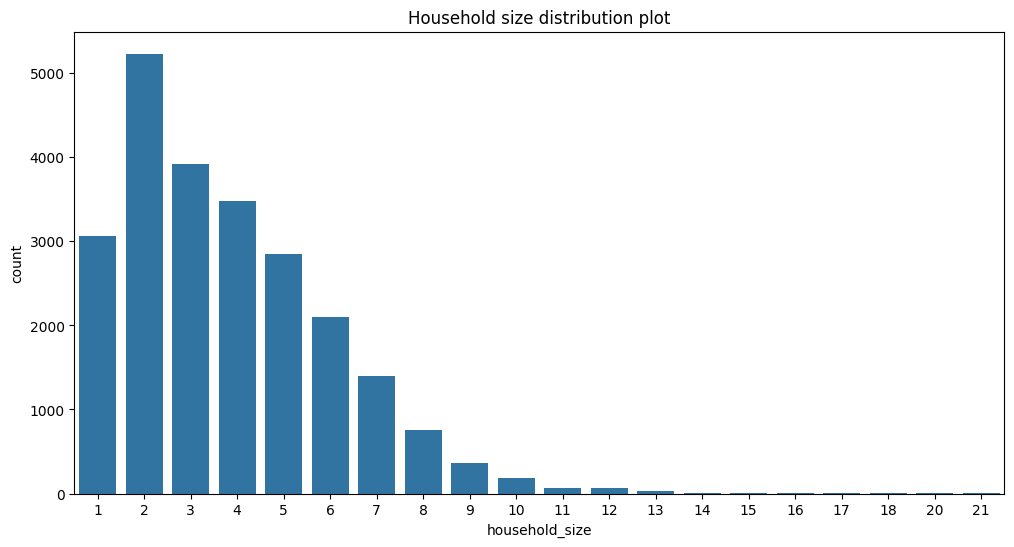

In [1481]:
plt.figure(figsize =(12,6))

sns.countplot(train, x= 'household_size')

plt.title('Household size distribution plot')

Text(0.5, 1.0, 'Household size distribution plot')

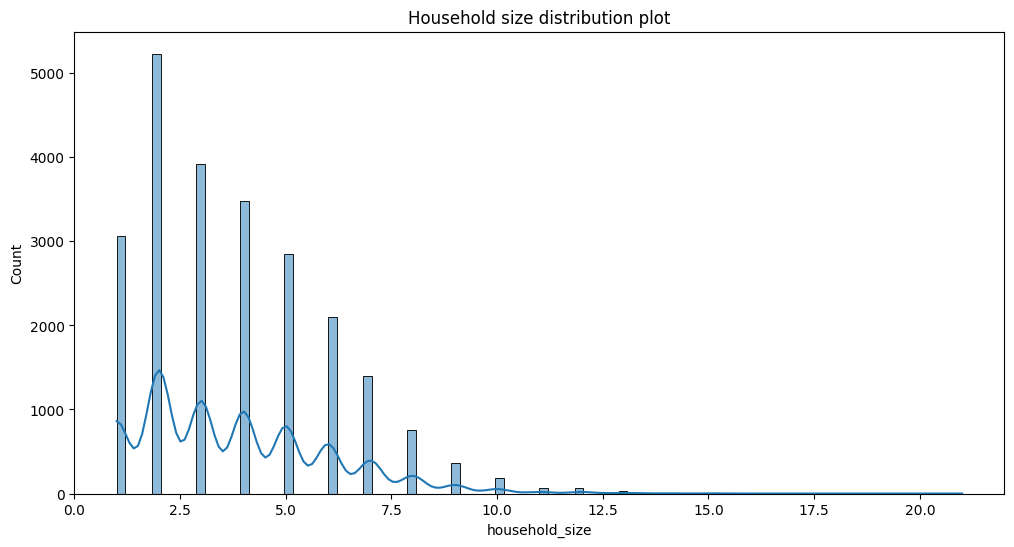

In [1482]:
# Alternativel: histogram plot
plt.figure(figsize =(12,6))
sns.histplot(data = train, x ='household_size', kde= True)

plt.title('Household size distribution plot')


Text(0.5, 1.0, ' Box plot for the Household Size distribution of the resondents')

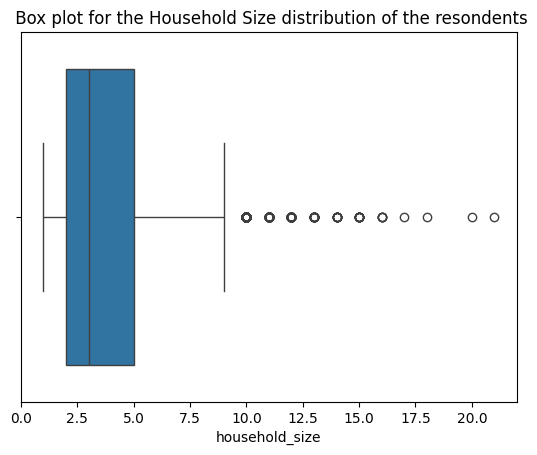

In [1483]:
# Boxplot
sns.boxplot(data = train, x='household_size')

plt.title(' Box plot for the Household Size distribution of the resondents')

In [1484]:
#Interpretation
train['household_size'].describe()

count    23524.000000
mean         3.797483
std          2.227613
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

##### Explore age

In [1485]:
train['age_of_respondent'].unique()

array([ 24,  70,  26,  34,  32,  42,  54,  76,  40,  69,  64,  31,  38,
        47,  27,  48,  25,  21,  18,  22,  58,  55,  62,  29,  35,  45,
        67,  19,  80,  66,  50,  33,  28,  51,  16,  17,  30,  37,  59,
        65,  46,  56,  52,  23,  43,  49,  44,  72,  53,  63,  39,  81,
        78,  36,  20,  60,  95,  71,  57,  85,  68,  41,  61,  75,  86,
        73,  93,  74,  88,  90,  77,  84,  82,  89,  79,  83,  94,  87,
        92,  91,  98,  97,  96,  99, 100])

Text(0.5, 1.0, 'Distribution plot of the age of respondents')

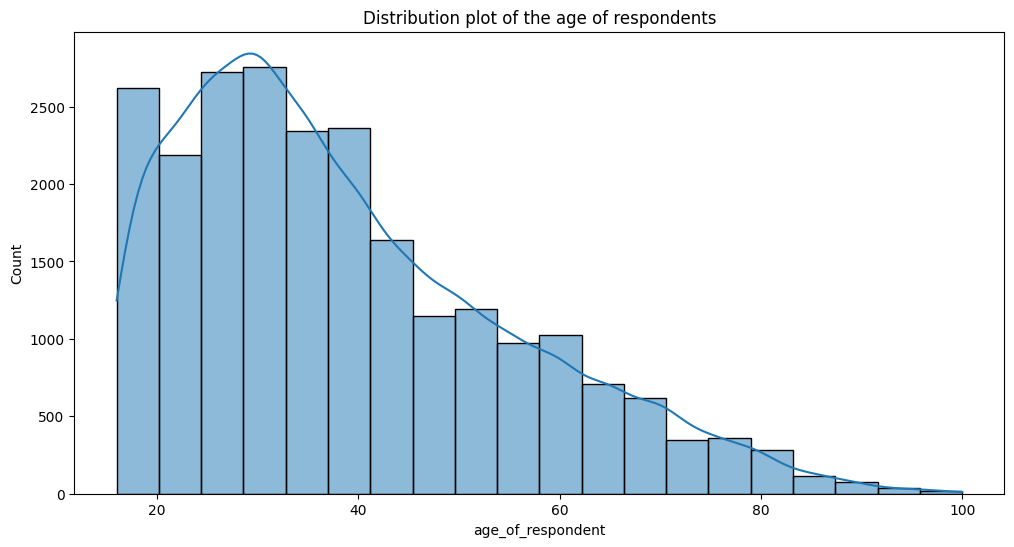

In [1486]:
# Age distribution plot
plt.figure(figsize =(12,6))

sns.histplot(train, x ='age_of_respondent' ,bins=20, kde=True)

plt.title('Distribution plot of the age of respondents')

Text(0.5, 1.0, ' Box plot for the age distribution of the resondents')

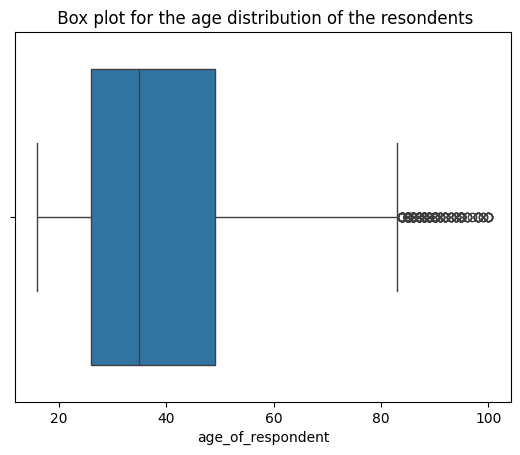

In [1487]:
# Boxplot
sns.boxplot(data = train, x='age_of_respondent')

plt.title(' Box plot for the age distribution of the resondents')


In [1488]:
# interpreting the boxplot
train['age_of_respondent'].describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

##### Explore gender

<Axes: xlabel='gender_of_respondent', ylabel='count'>

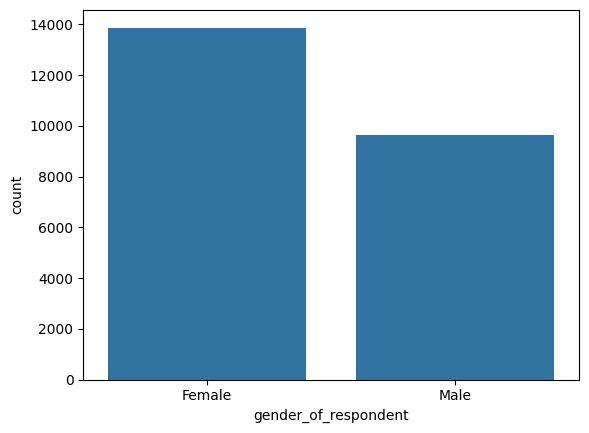

In [1489]:
sns.countplot(train, x ='gender_of_respondent')

##### Explore the relationship with head

In [1490]:
train['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

Text(0.5, 1.0, ' Count plot for relationship of interviewee with the head of household')

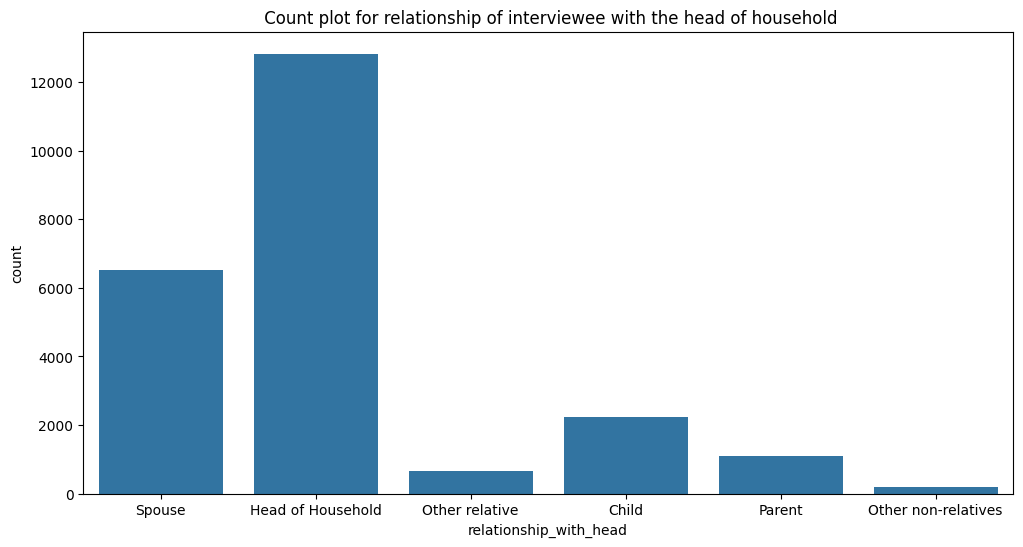

In [1491]:
plt.figure(figsize=(12, 6))
sns.countplot(train, x= 'relationship_with_head')

plt.title (' Count plot for relationship of interviewee with the head of household')

##### Explore marital status

In [1492]:
train['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

Text(0.5, 1.0, 'Distribution of marital status')

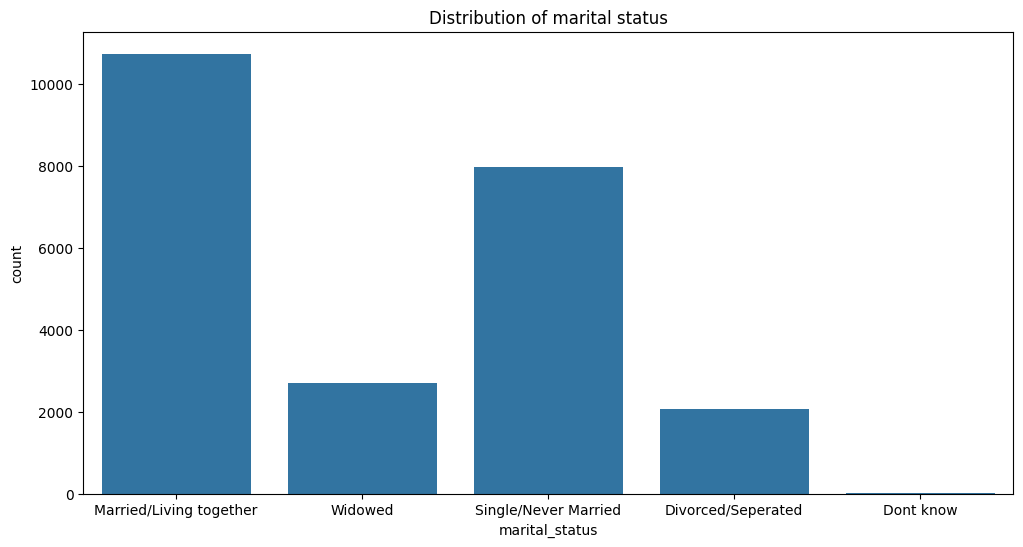

In [1493]:
plt.figure(figsize = (12,6))

sns.countplot (train, x ='marital_status')

plt.title ( 'Distribution of marital status')

##### Explore education level

In [1494]:
train['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

Text(0.5, 1.0, 'Countplot for the education level category')

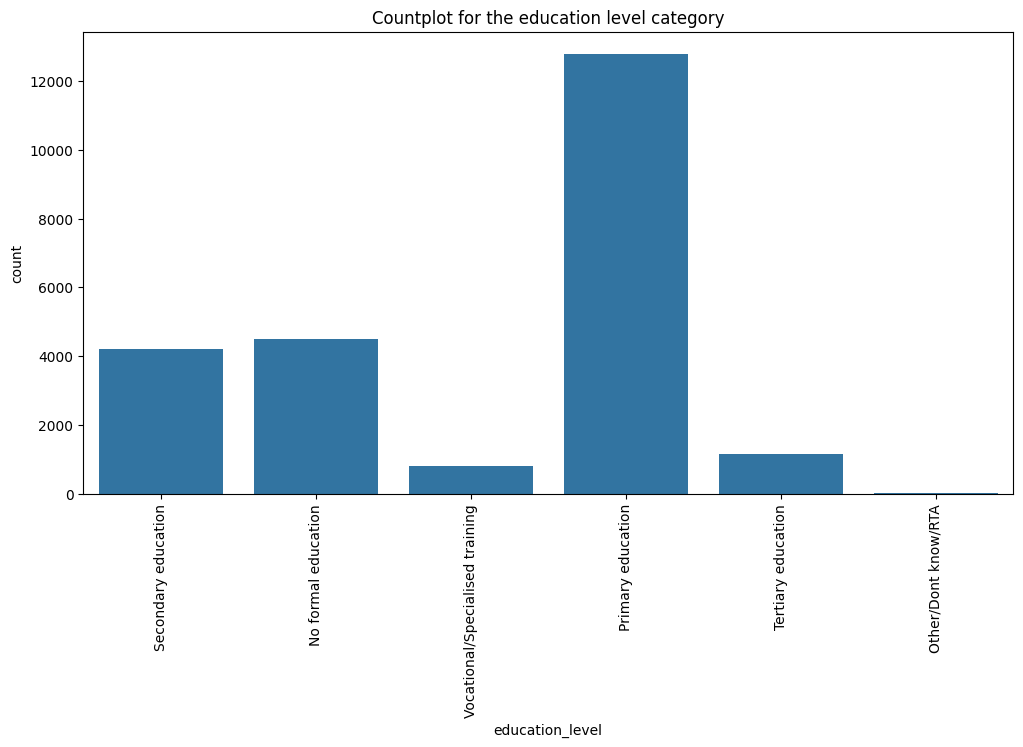

In [1495]:
plt.figure(figsize = (12,6))

sns.countplot (train, x ='education_level')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

plt.title ( 'Countplot for the education level category')

##### Explore job type

In [1496]:
train['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

Text(0.5, 1.0, 'Various jobs')

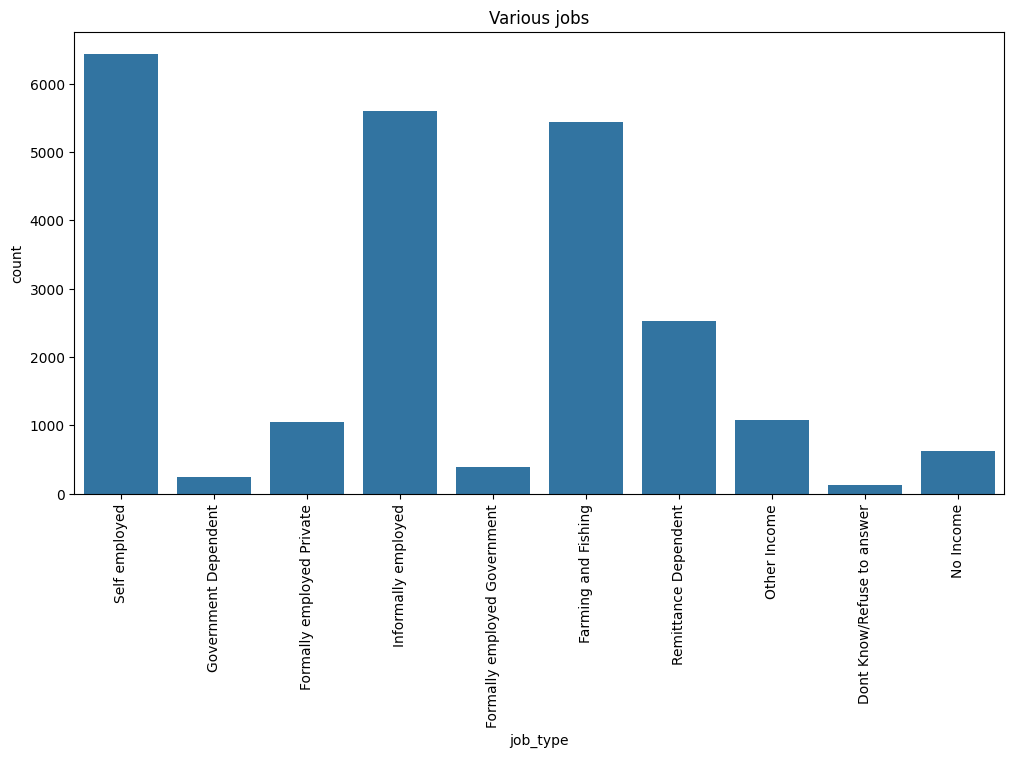

In [1497]:
plt.figure (figsize = (12,6))

sns.countplot(train, x ='job_type')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

plt.title('Various jobs')

### Correlation plot

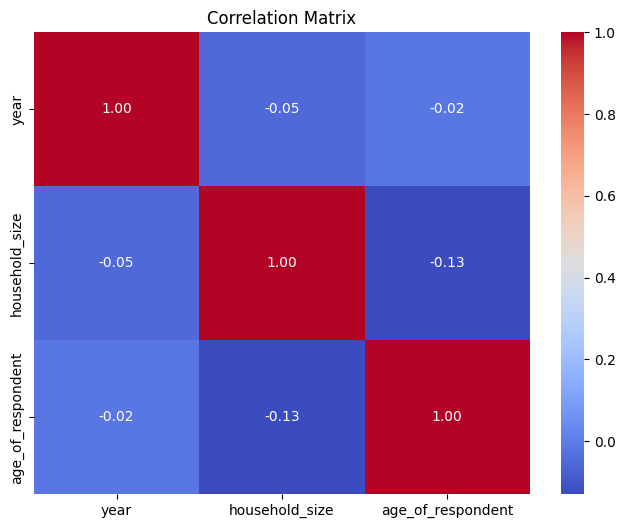

In [1498]:
# Calculate correlation matrix
numerical_variables = train.select_dtypes(include=['number'])
corr_matrix = numerical_variables.corr()

# Create correlation matrix plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Annotate with correlation coefficients

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

## Data Preprocessing and Feature Engineering

In [1499]:
# Categorical columns
train.select_dtypes(include=['object']).columns


Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [1500]:
#Numerical columns
train.select_dtypes(include =['int']).columns

Index(['year', 'household_size', 'age_of_respondent'], dtype='object')

### Handling categorical data
There are two types of categorical data:<br>
- **Nominal Data** <br>
In nominal data, the categories do not have a specific order. Changing the order does not affect the narure of the data. For example gender,color,country,city etc are nominal data.<br>

- **Ordinal Data** <br>
The categories in an ordinal data have a specific order and changing that order can affect the data. For example standard (1st, 2nd, 3rd etc), grade (A,B,C..) have levels and so, are ordinal data




##### Handling 'gender_of_respondent'

In [1501]:
'''
Binary encoding of the gender_of_repondent
The gender will be represented in two categories represented as 0 and 1. This encoding allows machine learning algorithms to process gnder information as numerical input.

'''
#Function to encode the gender of respondent
def encode_gender(dataframe, column_name):
  gender_map = {'Male' : 0,
                'Female' : 1
                }

   #create a new column with encoded labels
  dataframe[column_name + '_encoded'] = dataframe[column_name].map(gender_map)

  #Dropping the original column
  dataframe.drop(columns =[column_name], inplace = True)

  return dataframe


In [1502]:
# Function call
train = encode_gender(train, 'gender_of_respondent')

In [1503]:
train.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,gender_of_respondent_encoded
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Head of Household,Widowed,No formal education,Government Dependent,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Head of Household,Married/Living together,Primary education,Formally employed Private,1
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Child,Single/Never Married,Primary education,Informally employed,0


##### handling location_type

In [1504]:
# Encoding of the location_type column
def encode_location (dataframe, column_name):

  location_map = {'Rural': 0, 'Urban': 1}

   #create a new column with encoded labels
  dataframe[column_name + '_encoded'] = dataframe[column_name].map(location_map)

  #Drop the original column
  dataframe.drop(columns =[column_name], inplace = True)

  return dataframe

In [1505]:
#Function call
train = encode_location(train, 'location_type')

In [1506]:
train.head()

,country,year,uniqueid,bank_account,cellphone_access,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,gender_of_respondent_encoded,location_type_encoded
0,Kenya,2018,uniqueid_1,Yes,Yes,3,24,Spouse,Married/Living together,Secondary education,Self employed,1,0
1,Kenya,2018,uniqueid_2,No,No,5,70,Head of Household,Widowed,No formal education,Government Dependent,1,0
2,Kenya,2018,uniqueid_3,Yes,Yes,5,26,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,1
3,Kenya,2018,uniqueid_4,No,Yes,5,34,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0
4,Kenya,2018,uniqueid_5,No,No,8,26,Child,Single/Never Married,Primary education,Informally employed,0,1


##### Handling country column

In [1507]:
#Encoding of Country
def encode_country (dataframe, column_name):

  country_map = {'Kenya': 0,
               'Rwanda': 1,
               'Tanzania': 2,
               'Uganda': 3
               }
  #create a new column with encoded labels
  dataframe[column_name +'_encoded'] =dataframe[column_name].map(country_map)

  # Drop the original column
  dataframe.drop(columns = [column_name], inplace =True)

  return dataframe

In [1508]:
# Function call
train =encode_country(train, 'country')

In [1509]:
train.head(2)

,year,uniqueid,bank_account,cellphone_access,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,gender_of_respondent_encoded,location_type_encoded,country_encoded
0,2018,uniqueid_1,Yes,Yes,3,24,Spouse,Married/Living together,Secondary education,Self employed,1,0,0
1,2018,uniqueid_2,No,No,5,70,Head of Household,Widowed,No formal education,Government Dependent,1,0,0


##### Handling bank_account

In [1510]:
#Binary encoding of bank account

def encode_bank(dataframe,column_name):

  #map
  bank_map = {'Yes':0, 'No':1}

  #create a new column with encoded labels
  dataframe[ column_name +'_encoded'] =dataframe[column_name].map(bank_map)

  # Drop the original column
  dataframe.drop(columns = [column_name], inplace =True)

  return dataframe

In [1511]:
# Function call
train =encode_bank(train, 'bank_account')

In [1512]:
train.head(2)

,year,uniqueid,cellphone_access,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,gender_of_respondent_encoded,location_type_encoded,country_encoded,bank_account_encoded
0,2018,uniqueid_1,Yes,3,24,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0
1,2018,uniqueid_2,No,5,70,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,1


##### Handling cellphone access

In [1513]:
## Binary encoding cellphone access
def encode_cellphone(dataframe,column_name):
  #map
  phone_map = {'Yes':0, 'No':1}

  ##create a new column with encoded labels
  dataframe[column_name +'_encoded'] = dataframe[column_name].map(phone_map)

  # Drop the original cellphone access column
  dataframe.drop(columns =[column_name], inplace =True)

  return dataframe

In [1514]:
train = encode_cellphone(train,'cellphone_access')

In [1515]:
train.head(2)

,year,uniqueid,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,gender_of_respondent_encoded,location_type_encoded,country_encoded,bank_account_encoded,cellphone_access_encoded
0,2018,uniqueid_1,3,24,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,0
1,2018,uniqueid_2,5,70,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,1,1


##### Handling relationship with head column

In [1516]:
def encode_household (dataframe, column_name):


  # mapping categories of relationship_with_head to numerical labels
  household_map ={
    'Head of Household': 0,
    'Spouse': 1,
    'Parent': 2,
    'Child': 3,
    'Other relative': 4,
    'Other non-relatives': 5
  }

  #create a new column with encoded labels
  dataframe[column_name + '_encoded'] = dataframe[column_name].map(household_map)

  #drop the orginal column
  dataframe.drop(columns =[column_name], inplace = True)

  return dataframe


In [1517]:
#function call
train = encode_household(train, 'relationship_with_head')

In [1518]:
train.head(2)

,year,uniqueid,household_size,age_of_respondent,marital_status,education_level,job_type,gender_of_respondent_encoded,location_type_encoded,country_encoded,bank_account_encoded,cellphone_access_encoded,relationship_with_head_encoded
0,2018,uniqueid_1,3,24,Married/Living together,Secondary education,Self employed,1,0,0,0,0,1
1,2018,uniqueid_2,5,70,Widowed,No formal education,Government Dependent,1,0,0,1,1,0


##### Handling marital_status column

In [1519]:
#mapping categories of marital_status to numerical labels
def encode_marital (dataframe, column_name):
  #map
  marital_map = {
    'Married/Living together': 0,
    'Widowed': 1,
    'Single/Never Married': 2,
    'Divorced/Seperated': 3,
    'Dont know': 4
    }

  #create new column with encoded labels
  dataframe[column_name +'_encoded'] = dataframe[column_name].map(marital_map)

  #drop original column
  dataframe.drop(columns =[column_name], inplace = True)

  return dataframe

In [1520]:
#Function call
train = encode_marital(train, 'marital_status')

In [1521]:
train.tail(2)

,year,uniqueid,household_size,age_of_respondent,education_level,job_type,gender_of_respondent_encoded,location_type_encoded,country_encoded,bank_account_encoded,cellphone_access_encoded,relationship_with_head_encoded,marital_status_encoded
23522,2018,uniqueid_2116,7,30,Secondary education,Self employed,1,1,3,1,0,2,3
23523,2018,uniqueid_2117,10,20,Secondary education,No Income,0,0,3,1,0,3,2


#### Handling education level

In [1522]:
# mapping categories of education level to numerical labels
def encode_education(dataframe, column_name):

  #Map
  education_map ={
    'Vocational/Specialised training': 0,
    'Tertiary education': 1,
    'Secondary education': 2,
    'Primary education': 3,
    'No formal education': 4,
    'Other/Dont know/RTA': 5
  }

  #create new column with encoded labels
  dataframe[column_name + '_encoded'] = dataframe[column_name].map(education_map)

  #Drop original column
  dataframe.drop(columns=[column_name],inplace =True)

  return dataframe

In [1523]:
# Function call
train =encode_education(train,'education_level')

In [1524]:
train.tail(2)

,year,uniqueid,household_size,age_of_respondent,job_type,gender_of_respondent_encoded,location_type_encoded,country_encoded,bank_account_encoded,cellphone_access_encoded,relationship_with_head_encoded,marital_status_encoded,education_level_encoded
23522,2018,uniqueid_2116,7,30,Self employed,1,1,3,1,0,2,3,2
23523,2018,uniqueid_2117,10,20,No Income,0,0,3,1,0,3,2,2


##### Handling job_type column

In [1525]:
# mapping categories of job_type to numerical labels

def encode_job(dataframe, column_name):

  #Map
  job_map = {
    'Self employed': 0,
    'Government Dependent': 1,
    'Formally employed Private': 2,
    'Informally employed': 3,
    'Formally employed Government': 4,
    'Farming and Fishing': 5,
    'Remittance Dependent':6,
    'Other Income': 7,
    'Dont Know/Refuse to answer': 8,
    'No Income':9
    }
  #Create new column with encoded labels
  dataframe[column_name] =dataframe[column_name].map(job_map)

  #drop original column
  dataframe.drop(columns =[column_name], inplace = True)

  return dataframe

In [1526]:
#function call
train =encode_job(train,'job_type')

In [1527]:
train.head()

,year,uniqueid,household_size,age_of_respondent,gender_of_respondent_encoded,location_type_encoded,country_encoded,bank_account_encoded,cellphone_access_encoded,relationship_with_head_encoded,marital_status_encoded,education_level_encoded
0,2018,uniqueid_1,3,24,1,0,0,0,0,1,0,2
1,2018,uniqueid_2,5,70,1,0,0,1,1,0,1,4
2,2018,uniqueid_3,5,26,0,1,0,0,0,4,2,0
3,2018,uniqueid_4,5,34,1,0,0,1,0,0,0,3
4,2018,uniqueid_5,8,26,0,1,0,1,1,3,2,3


### Handling numerical values

#### Handling outliers
Outlier is an observation in a given dataset that lies far from the rest of the observations.
That means an outlier is vastly larger or smaller than the remaining values in the set.

##### Why do they occur?
An outlier may occur due to the variability in the data, or due to experimental/human error.<br>
They may indicate an experimental error or heavy skewness in the data (heavy-tailed distribution)

##### What do they affect?
In statistics, we have three measures of central tendency namely: Mean,Median and Mode.<br>
- Mean is the accurate measure to describe data when we do not have any outliers present.<br>
- Median is used if there is an outlier in the dataset.<br>
- Mode is used if there is and outlier AND about half or more of the data is the same.<br>
mean is the only measure of central tendency that is affected by otuliers which in turn impacts Standard Deviation.<br>
Standard deviation meaasures the spread of data around the mean.


##### Handling Household size

Text(0.5, 1.0, 'Household size distribution')

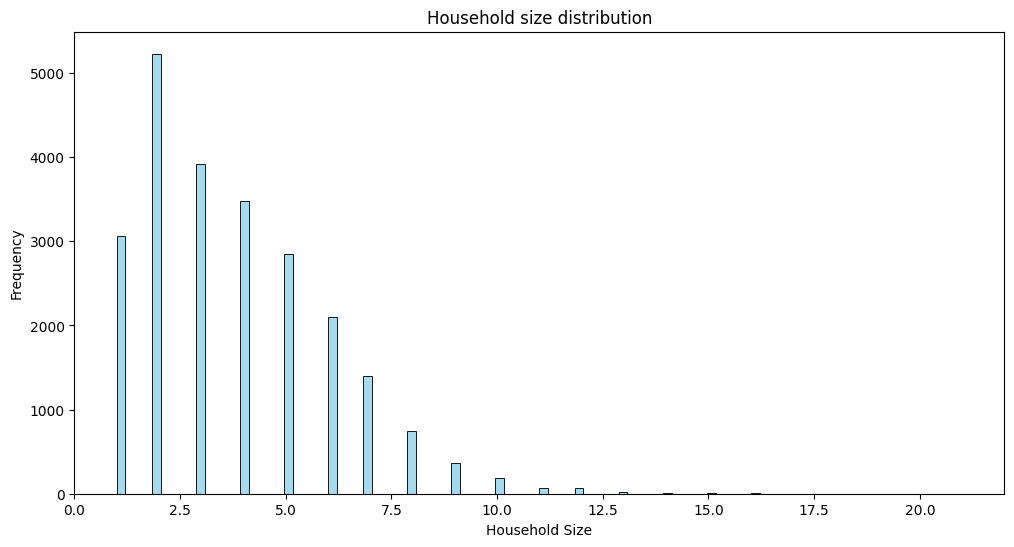

In [1528]:
#Visualizing the distribution
plt.figure(figsize = (12,6))

sns.histplot(data =train, x= 'household_size',color ='skyblue')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.title('Household size distribution')

**Observation**
The data does not follow a normal distribution. Since the data is rightly-skewed, instead of using a z-score we can use interquartile range (IQR) to determing the outliers

<Axes: ylabel='household_size'>

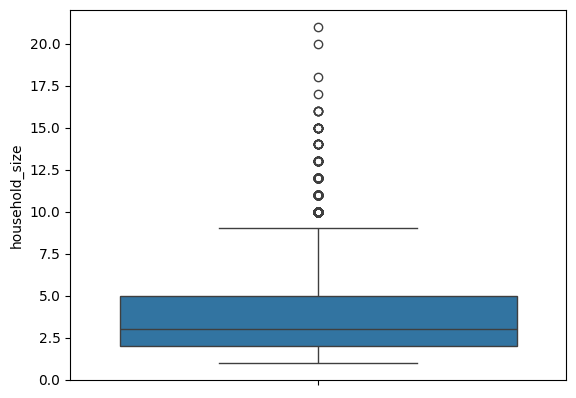

In [1529]:
#Finding outliers in the data using a boxplot
sns.boxplot(train, y= 'household_size')

**Observation** <br>
There are a lot of outliers. Above the box and upper fence there are some points showing outliers.

In [1530]:
# Alternatively, using plotly for an interactive box plot
import plotly.express as px
px.box(train, x='household_size')

In [1531]:
#Using describe() function to check for outliers
train['household_size'].describe()

count    23524.000000
mean         3.797483
std          2.227613
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

**Observation**<br>
Generating summary statistics is a quick way to help us determine whether or not the dataset has outliers. <br>
The **household_size** variable has outliers. As observed, the maximum value is 21 while the mean value is 3.797. The mean is sensitive to outliers, but the fact that the mean is so small compared to the max value indicates the max value is an outlier.

In [1532]:
# User defined function to compute various statistical measures:
from scipy import stats

def calculate_column_statistics(dataframe, column_name):

    column_data = dataframe[column_name] # Extract the specified column

    mean_value = column_data.mean()
    median_value = column_data.median()
    mode_value = column_data.mode().iloc[0]  # Select the first mode if multiple modes exist
    variance_value = column_data.var()       #  # Calculate variance
    std_dev_value = column_data.std()


    # Construct a Series to hold the results
    statistics_series = pd.Series({
        'Mean': mean_value,
        'Median': median_value,
        'Mode': mode_value,
        'Variance': variance_value,
        'Standard Deviation': std_dev_value
    })

    return statistics_series


In [1533]:
#Function call , statistical variables with outliers present in the dataframe

column_statistics = calculate_column_statistics(train, 'household_size')
print(column_statistics)


Mean                  3.797483
Median                3.000000
Mode                  2.000000
Variance              4.962259
Standard Deviation    2.227613
dtype: float64


In [1534]:
# Detecting outliers using the IQR


def detect_outliers(dataframe,column_name,threshold = 1.5):

  outliers = [] #empty list

  column_data =dataframe[column_name] #extract the specified column

  # calculate the IQR
  Q1 = column_data.quantile(0.25)
  Q3 = column_data.quantile(0.75)

  IQR = Q3-Q1

  #Print Q1,Q2 and IQR
  print("Q1: ", Q1)
  print("Q3: ", Q3)
  print("IQR: ", IQR)

  #Define lower and upper bounds for the outliers
  lower_bound = Q1 - (threshold * IQR)
  upper_bound = Q3 + (threshold * IQR)

  # Print the bounds
  print("Lower Bound:", lower_bound)
  print("Upper Bound:", upper_bound)

  # compute the outliers
  for i in column_data:
    if (i < lower_bound or i > upper_bound):
      outliers.append(i)

  return outliers

In [1535]:
#function call
household_size_outliers = detect_outliers(train, 'household_size')
print('Outliers:', household_size_outliers)


Q1:  2.0
Q3:  5.0
IQR:  3.0
Lower Bound: -2.5
Upper Bound: 9.5
Outliers: [10, 11, 10, 10, 12, 16, 10, 10, 11, 10, 10, 12, 10, 11, 11, 10, 10, 16, 10, 11, 11, 15, 10, 10, 13, 10, 10, 11, 11, 11, 10, 10, 13, 10, 10, 12, 10, 12, 12, 10, 10, 10, 12, 11, 11, 10, 10, 10, 10, 11, 13, 13, 10, 12, 12, 12, 11, 12, 13, 10, 10, 10, 11, 11, 10, 10, 10, 10, 10, 10, 12, 11, 12, 13, 11, 11, 11, 11, 10, 14, 21, 11, 14, 10, 10, 12, 10, 15, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 15, 10, 10, 15, 13, 10, 10, 10, 10, 11, 11, 10, 13, 12, 13, 11, 10, 11, 10, 10, 10, 10, 11, 10, 10, 13, 11, 11, 10, 10, 10, 11, 10, 11, 10, 11, 11, 10, 10, 10, 10, 10, 10, 10, 12, 11, 10, 11, 10, 11, 10, 12, 11, 10, 12, 10, 10, 10, 10, 12, 12, 10, 13, 10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 11, 10, 12, 11, 10, 10, 10, 12, 11, 10, 10, 10, 10, 11, 10, 10, 10, 12, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 14, 10, 12, 12, 11, 11, 11, 10, 10, 10, 10, 11, 12, 10, 13, 10, 10, 10, 14, 12, 12, 13, 10, 13, 12, 12

##### **Handling the outliers**
There are three techniques that can be used to handle the outliers:<br>
- Drop the outliers <br>
- Cap the outliers <br>
- Replace the outliers using imputations <br>

In [1536]:
'''

HANDLING THE OUTLIERS BY IMPUTING THE MEDIAN

As the mean is highly influenced by outliers, we replace the outliers with the median value

'''
def replace_outliers_with_median(dataframe, outliers, column_name):


    median_value = dataframe[column_name].median()
    for out in outliers:
        dataframe.loc[dataframe[column_name] == out, column_name] = median_value #assign the median to the specific rows where the outliers are found
    return dataframe


In [1537]:
# Call the function to replace_outliers_with_median function
clean_train1 = replace_outliers_with_median(train, household_size_outliers, 'household_size')

In [1538]:
# Visualizing the data after treating the outlier
px.box(clean_train1, x='household_size')

Text(0.5, 1.0, 'Household size distribution after treating outliers')

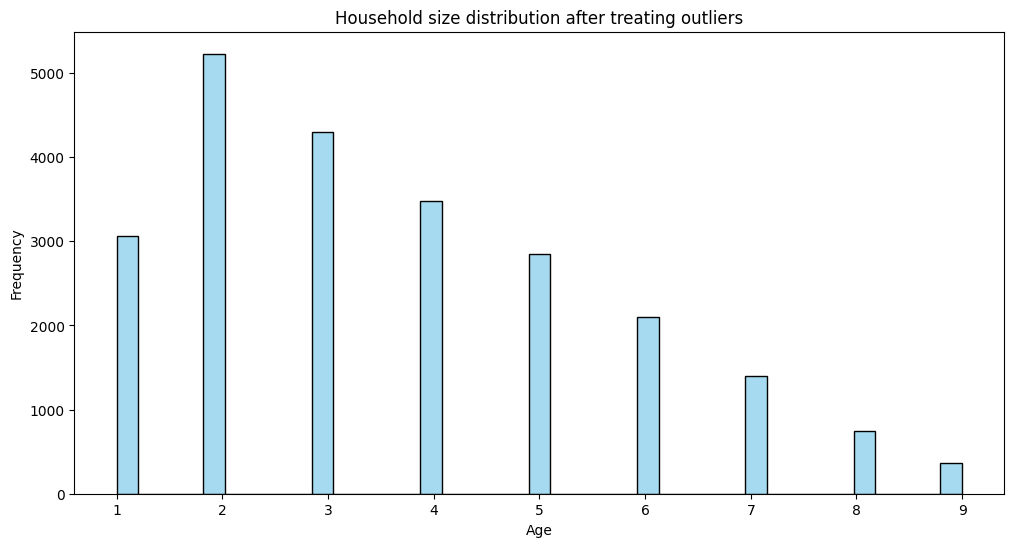

In [1539]:
#Visualization of distribution of the age of respondent
plt.figure(figsize = (12,6))

sns.histplot(data =clean_train1, x= 'household_size',color ='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Household size distribution after treating outliers')


In [1540]:
#Function call , statistical variables with no outliers present in the dataframe

column_statistics = calculate_column_statistics(clean_train1, 'household_size')
print(column_statistics)


Mean                  3.665618
Median                3.000000
Mode                  2.000000
Variance              4.039780
Standard Deviation    2.009920
dtype: float64


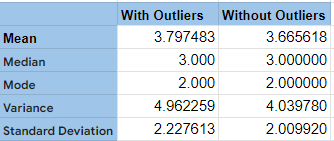

##### Handling the age of respondent

Text(0.5, 1.0, 'Age of respondent distribution')

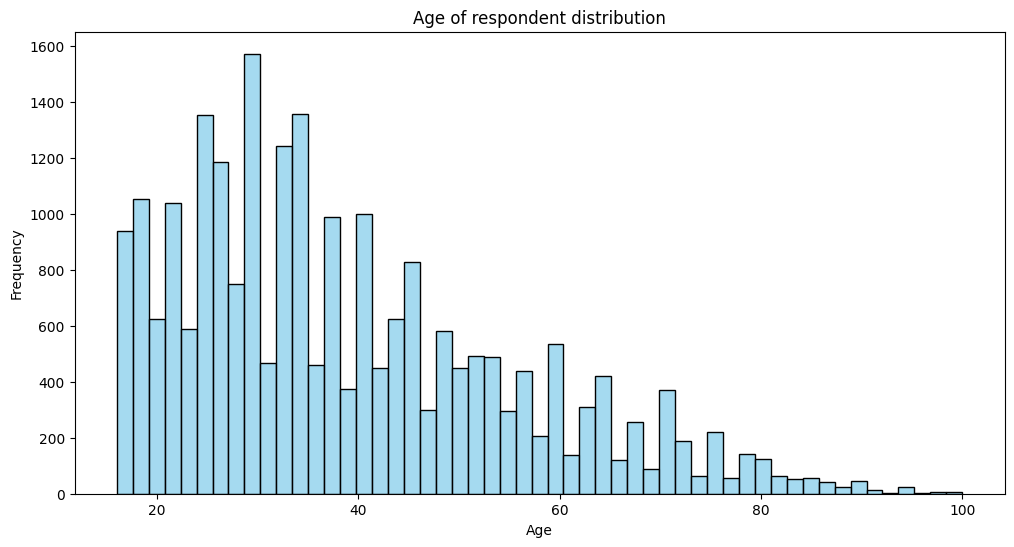

In [1541]:
#Visualization of distribution of the age of respondent
plt.figure(figsize = (12,6))

sns.histplot(data =train, x= 'age_of_respondent',color ='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of respondent distribution')


**Observation**
The data does not follow a normal distribution. Since the data is rightly-skewed, instead of using a z-score we can use interquartile range (IQR) to determing the outliers

In [1542]:
#Visualizing outliers using boxplot
px.box(train, x = 'age_of_respondent')

In [1543]:
train['age_of_respondent'].describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

**Observation**<br>
The **age_of_respondent** variable has outliers. As observed, the maximum value is 100 while the mean value is 38.81. The mean is sensitive to outliers, but the fact that the mean is so small compared to the max value indicates the max value is an outlier.

In [1544]:
#Function call , statistical variables with outliers present in the dataframe

column_statistics = calculate_column_statistics(train, 'age_of_respondent')
print(column_statistics)

Mean                   38.805220
Median                 35.000000
Mode                   30.000000
Variance              272.929198
Standard Deviation     16.520569
dtype: float64


In [1545]:
#Outliers
age_outliers = detect_outliers(train, 'age_of_respondent')
print('Outliers:', age_outliers)

Q1:  26.0
Q3:  49.0
IQR:  23.0
Lower Bound: -8.5
Upper Bound: 83.5
Outliers: [95, 85, 95, 86, 95, 85, 93, 85, 88, 85, 90, 88, 84, 85, 84, 89, 95, 85, 88, 85, 85, 94, 95, 87, 93, 87, 85, 85, 90, 84, 86, 86, 92, 92, 86, 90, 85, 86, 88, 88, 84, 84, 87, 90, 88, 84, 90, 91, 86, 93, 95, 90, 88, 89, 88, 89, 85, 85, 88, 85, 95, 85, 86, 85, 88, 86, 84, 90, 89, 89, 89, 90, 95, 93, 92, 95, 86, 94, 86, 84, 92, 87, 95, 90, 88, 86, 95, 87, 95, 84, 89, 95, 85, 98, 87, 95, 97, 92, 89, 92, 87, 84, 86, 84, 88, 85, 86, 86, 85, 89, 96, 86, 87, 89, 99, 88, 85, 85, 89, 94, 85, 85, 88, 85, 85, 85, 84, 84, 85, 84, 91, 87, 85, 91, 90, 89, 87, 89, 85, 87, 88, 86, 84, 85, 85, 90, 84, 95, 85, 87, 88, 85, 85, 85, 85, 84, 88, 89, 90, 85, 87, 96, 100, 86, 90, 90, 89, 88, 98, 91, 88, 92, 95, 88, 85, 89, 94, 88, 99, 87, 90, 90, 85, 88, 85, 85, 90, 86, 90, 85, 90, 85, 100, 85, 88, 86, 95, 85, 91, 87, 86, 90, 95, 94, 90, 98, 85, 86, 87, 85, 84, 85, 86, 98, 86, 100, 86, 85, 85, 100, 85, 90, 85, 90, 88, 100, 90, 84, 90, 8

In [1546]:
'''
Handling the outliers
Call the function to replace_outliers_with_median function
'''
clean_train2 = replace_outliers_with_median(train, age_outliers, 'age_of_respondent')

In [1547]:
#Visualizing the data after treating the outliers
px.box(clean_train2, x='age_of_respondent')

**Observation** <br>
There are remaining outliers even after imputing them with the mean this could be as a result of **Skewed data distribution** . If the data is highly skewed, simply replacing the outliers with the median might not be sufficient to address the issue. Other techniques such as winsorization or transformation of the data may be used.<br>

The distribution of the data data might not be highly affected by outliers, or the outliers are not significantly extreme compared to the rest of the data.

In [1548]:
#Function call , statistical variables with no outliers present in the dataframe

column_statistics = calculate_column_statistics(clean_train2, 'age_of_respondent')
print(column_statistics)

Mean                   38.255356
Median                 35.000000
Mode                   35.000000
Variance              247.121501
Standard Deviation     15.720099
dtype: float64


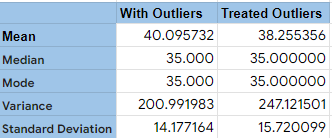

In [1549]:
training_set =clean_train2.copy()

In [1550]:
training_set.columns

Index(['year', 'uniqueid', 'household_size', 'age_of_respondent',
       'gender_of_respondent_encoded', 'location_type_encoded',
       'country_encoded', 'bank_account_encoded', 'cellphone_access_encoded',
       'relationship_with_head_encoded', 'marital_status_encoded',
       'education_level_encoded'],
      dtype='object')

In [1551]:
# Renaming the columns
training_set.rename(columns ={
    'country_encoded': 'country',
    'bank_account_encoded': 'bank_account',
    'location_type_encoded': 'location_type',
    'cellphone_access_encoded': 'cellphone_access',
    'household_size': 'household_size',
    'gender_of_respondent_encoded': 'gender_of_respondent',
    'relationship_with_head_encoded': 'relationship_with_head',
    'marital_status_encoded': 'marital_status',
    'education_level_encoded': 'education_level',
    'job_type_encoded': 'job_type'
}, inplace =True)

In [1552]:
training_set.head(2)

,year,uniqueid,household_size,age_of_respondent,gender_of_respondent,location_type,country,bank_account,cellphone_access,relationship_with_head,marital_status,education_level
0,2018,uniqueid_1,3,24,1,0,0,0,0,1,0,2
1,2018,uniqueid_2,5,70,1,0,0,1,1,0,1,4


## Process the test data

In [1553]:
test_unprocessed =test.copy()

In [1554]:
test_unprocessed.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [1555]:
test_unprocessed1 =test_unprocessed.copy()

In [1556]:
# Preprocessing the test data
test_processed1 = encode_country (test_unprocessed1 , 'country')
test_processed1= encode_location (test_unprocessed1 , 'location_type')
test_processed1 = encode_cellphone(test_unprocessed1 , 'cellphone_access')
test_processed1 = encode_gender(test_unprocessed1 ,'gender_of_respondent')
test_processed1 = encode_household(test_unprocessed1 ,'relationship_with_head')
test_processed1 = encode_marital(test_unprocessed1 ,'marital_status')
test_processed1 = encode_education(test_unprocessed1 , 'education_level')
test_processed1 = encode_job (test_unprocessed1 , 'job_type')

In [1557]:
#Preview the preprocessed test data
test_processed1.head(15)

,year,uniqueid,household_size,age_of_respondent,country_encoded,location_type_encoded,cellphone_access_encoded,gender_of_respondent_encoded,relationship_with_head_encoded,marital_status_encoded,education_level_encoded
0,2018,uniqueid_6056,3,30,0,1,0,0,0,0,2
1,2018,uniqueid_6060,7,51,0,1,0,0,0,0,0
2,2018,uniqueid_6065,3,77,0,0,1,1,2,0,4
3,2018,uniqueid_6072,6,39,0,0,1,1,0,0,3
4,2018,uniqueid_6073,3,16,0,1,1,0,3,2,2
5,2018,uniqueid_6074,4,25,0,0,0,1,1,0,3
6,2018,uniqueid_6075,4,32,0,0,0,1,0,3,3
7,2018,uniqueid_6076,3,24,0,1,0,1,1,0,0
8,2018,uniqueid_6077,4,22,0,0,0,1,3,2,3
9,2018,uniqueid_6078,1,42,0,1,0,0,0,3,2


In [1558]:
# Renaming the columns
test_processed1.rename(columns ={
    'country_encoded': 'country',
    'bank_account_encoded': 'bank_account',
    'location_type_encoded': 'location_type',
    'cellphone_access_encoded': 'cellphone_access',
    'household_size': 'household_size',
    'gender_of_respondent_encoded': 'gender_of_respondent',
    'relationship_with_head_encoded': 'relationship_with_head',
    'marital_status_encoded': 'marital_status',
    'education_level_encoded': 'education_level',
    'job_type_encoded': 'job_type'
}, inplace =True)

In [1559]:
#Store the columns to drop
dropped_columns =test_processed1[['uniqueid']]

In [1560]:
# final preprocessed data
test_processed1.drop(columns=['year', 'uniqueid'], inplace=True)

In [1561]:
#Reordering the columns so that they match those of the training set

desired_order = ['household_size', 'age_of_respondent', 'gender_of_respondent','location_type', 'country', 'cellphone_access', 'relationship_with_head', 'marital_status', 'education_level']

processed_test = test_processed1 [desired_order]


In [1562]:
processed_test.head(2)

,household_size,age_of_respondent,gender_of_respondent,location_type,country,cellphone_access,relationship_with_head,marital_status,education_level
0,3,30,0,1,0,0,0,0,2
1,7,51,0,1,0,0,0,0,0


# Model

In [1563]:
import sklearn.model_selection

In [1564]:
# Target Variable
y = training_set['bank_account']

In [1565]:
# X Features
X = training_set.drop(columns = [ 'year', 'uniqueid', 'bank_account'])

In [1566]:
print ('Shape of training set: ', X.shape)
print ('Shape of the testing set: ', processed_test.shape)

Shape of training set:  (23524, 9)
Shape of the testing set:  (10086, 9)


In [1567]:
X.head()

,household_size,age_of_respondent,gender_of_respondent,location_type,country,cellphone_access,relationship_with_head,marital_status,education_level
0,3,24,1,0,0,0,1,0,2
1,5,70,1,0,0,1,0,1,4
2,5,26,0,1,0,0,4,2,0
3,5,34,1,0,0,0,0,0,3
4,8,26,0,1,0,1,3,2,3


In [1568]:
processed_test.head()

,household_size,age_of_respondent,gender_of_respondent,location_type,country,cellphone_access,relationship_with_head,marital_status,education_level
0,3,30,0,1,0,0,0,0,2
1,7,51,0,1,0,0,0,0,0
2,3,77,1,0,0,1,2,0,4
3,6,39,1,0,0,1,0,0,3
4,3,16,0,1,0,1,3,2,2


In [1569]:
# Splitting the training set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =42)

In [1570]:
# Check the shapes of the training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16466, 9)
(7058, 9)
(16466,)
(7058,)


#### Ordinary Least Squares (OLS) for linear regresion modeling

In [1571]:
# Ordinary Least Squares (OLS) for linear regresion modeling
import statsmodels.api as sm
X_train_sm = sm.add_constant (X_train) # add constant to get an intercept
lr = sm.OLS(y_train, X_train_sm).fit() #fit model

In [1572]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           bank_account   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     447.9
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:19:39   Log-Likelihood:                -4196.5
No. Observations:               16466   AIC:                             8413.
Df Residuals:                   16456   BIC:                             8490.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

**Observation**<br>
**R-squared** is 0.198 meaning approximately 19.8%  meaning the model explains 19.8% of the variance in the target variable, while the remaining 80.2% of the variance is unexplained by the model. Hence this is not a suitable prediction model

In [1573]:
# Performing predictions
X_test_sm = sm.add_constant(X_test) #adding a constant to X_test
y_pred_lr = lr.predict(X_test_sm)

In [1574]:
print('Sample of predicted values')
y_pred_lr.head()

Sample of predicted values


6692     0.954493
7628     0.818063
10873    0.837733
19704    0.833323
7047     0.767653
dtype: float64

#### XGBoost

In [1575]:
from xgboost import XGBClassifier

xg = XGBClassifier () #instantiate

#fit model
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

The evaluation metric will be the percentage of survey respondents for whom you predict the binary 'bank account' classification incorrectly.

This means the lower the incorrect percentage we get, the better the model performance.

In [1576]:
# Get predicted values
y_pred_xg = xg.predict(X_test)


In [1577]:
print('Sample of predicted values')
y_pred_xg

Sample of predicted values


array([1, 1, 1, ..., 1, 1, 1])

In [1578]:
#Prediction on the test dataset
predictions_xgboost = xg.predict(processed_test)

In [1579]:
predictions_xgboost

array([0, 0, 1, ..., 1, 1, 1])

In [1580]:
#Model evaluation
from sklearn.metrics import accuracy_score

#model evaluation
xg_y_model =xg.predict(X_test)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_test, xg_y_model))

Error rate of XGB classifier:  0.12439784641541518


In [1581]:
#Calulate mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_xg)
print('Mean Squared Error: ', mse)

Mean Squared Error:  0.12439784641541513


#### Random Forest

In [1582]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() #instantiate model

#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [1583]:
#Get predicted values
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 0, ..., 1, 1, 1])

In [1584]:
#Model evaluation
accuracy =accuracy_score(y_test,y_pred_rf)
print('Accuracy: ', accuracy)


Accuracy:  0.8578917540379711


In [1585]:
#Prediction on the test dataset
predictions_randomforest = rf.predict(processed_test)

In [1586]:
predictions_randomforest

array([0, 0, 1, ..., 1, 1, 1])

## Model Accuracy score comparison

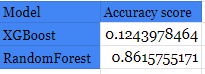

## For submission

In [1587]:
# Encoded dataframe from the test dataframe
test_encoded = encode_country(test_unprocessed.copy(), 'country')

# Submission DataFrame for Random Forest predictions
submission_randomforest = pd.DataFrame({"uniqueid": dropped_columns['uniqueid'] + " x " + test_encoded["country_encoded"].map({0: 'Kenya', 1: 'Rwanda', 2: 'Tanzania', 3: 'Uganda'}),
                           "bank_account": predictions_randomforest })



In [1588]:
print("\nSubmission DataFrame for Random Forest predictions:")
submission_randomforest.head()


Submission DataFrame for Random Forest predictions:


,uniqueid,bank_account
0,uniqueid_6056 x Kenya,0
1,uniqueid_6060 x Kenya,0
2,uniqueid_6065 x Kenya,1
3,uniqueid_6072 x Kenya,1
4,uniqueid_6073 x Kenya,1


In [1589]:
# Submission DataFrame for XGBoost predictions
submission_xgboost = pd.DataFrame({
    "uniqueid": dropped_columns['uniqueid'] + " x " + test_encoded["country_encoded"].map({0: 'Kenya', 1: 'Rwanda', 2: 'Tanzania', 3: 'Uganda'}),
    'bank_account': predictions_xgboost  # Use the predictions from XGBoost model
})


In [1590]:
print("Submission DataFrame for XGBoost predictions:")
submission_xgboost.head()

Submission DataFrame for XGBoost predictions:


,uniqueid,bank_account
0,uniqueid_6056 x Kenya,0
1,uniqueid_6060 x Kenya,0
2,uniqueid_6065 x Kenya,1
3,uniqueid_6072 x Kenya,1
4,uniqueid_6073 x Kenya,1


## Saving results in csv

In [1591]:
submission_xgboost.to_csv('first_submission.csv', index =False)

print("Submission CSV file 'first_submission.csv' has been created")

Submission CSV file 'first_submission.csv' has been created
